Importing a libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics

Reading the data

In [4]:
data=pd.read_csv("vehicle.csv")

Checking the top 5 data of our dataset

In [5]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


While checking our data, we found that only Class variable is non-numeric.

Data preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [8]:
data['class']=data['class'].astype('category')

In [9]:
data.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [10]:
data.shape

(846, 19)

Checking for missing values

In [11]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
for i in data.columns[:17]:
    median=data[i].median()
    data[i]=data[i].fillna(median)


In [13]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

Checking for Outliers with the help of boxplot

<AxesSubplot:>

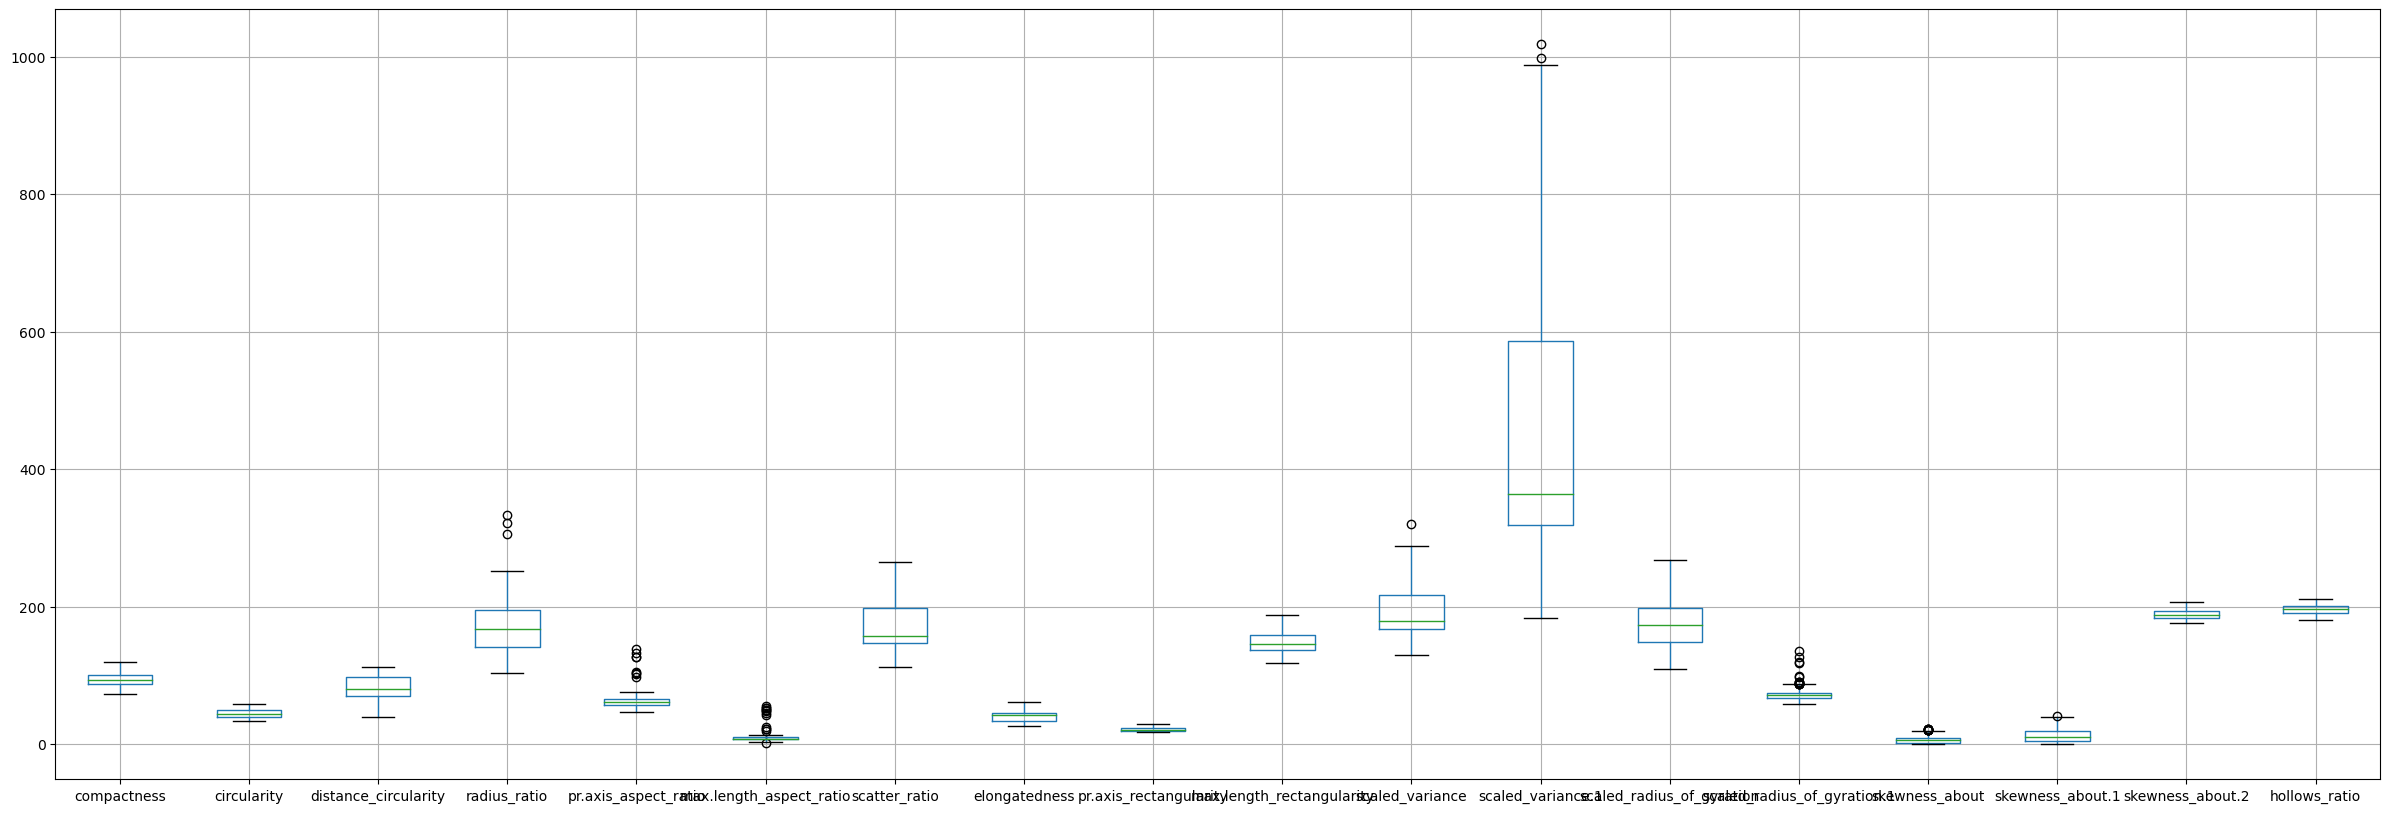

In [15]:
data.boxplot(figsize=(30,10))

Replacing outliers with median

In [16]:
for x in data.columns[:-1]:
    q1=data[x].quantile(0.25)
    q3=data[x].quantile(0.75)
    iqr=q3-q1
    
    low=q1-1.5*(iqr)
    high=q3+1.5*(iqr)
    
    data.loc[(data[x]< low) | (data[x] > high) , x ] = data[x].median()
                       

<AxesSubplot:>

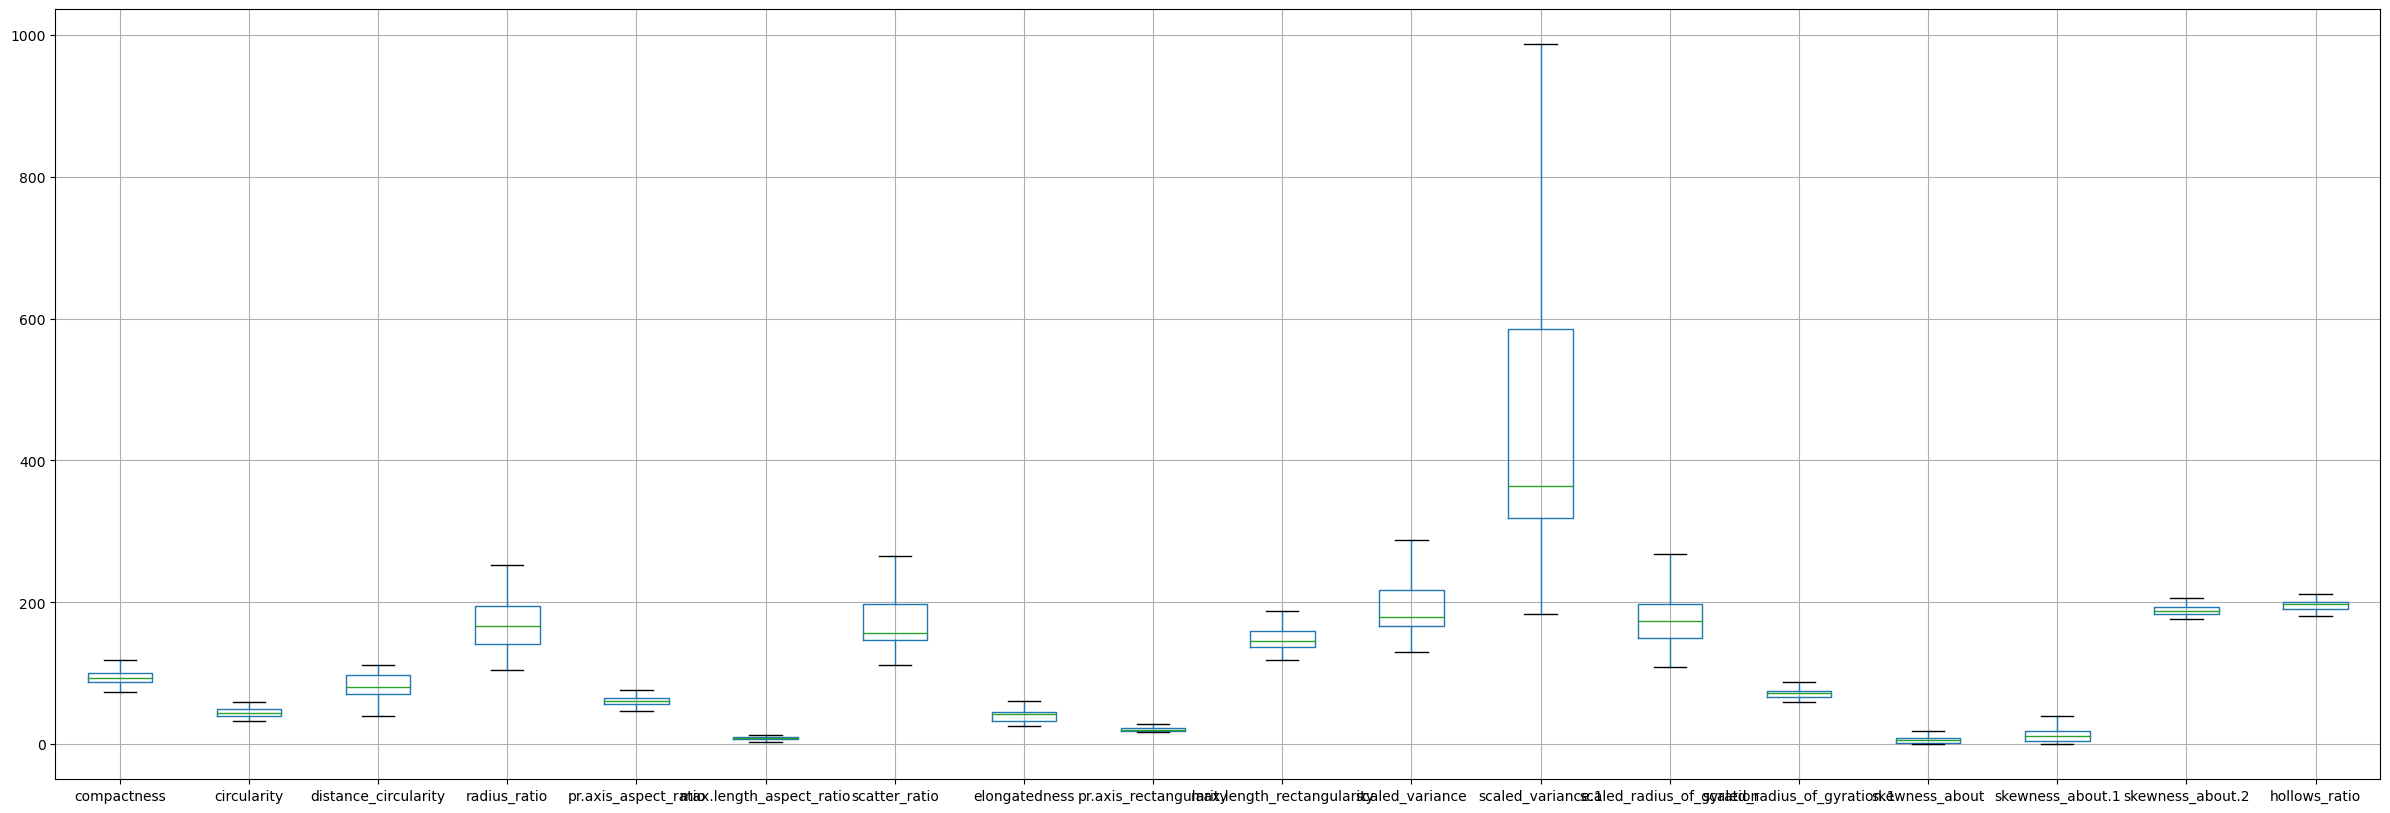

In [17]:
data.boxplot(figsize=(30,10))

Understanding the attribute(Dependent attribute)

In [18]:
print('class : \n',data['class'].unique())

class : 
 ['van', 'car', 'bus']
Categories (3, object): ['bus', 'car', 'van']


In [19]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Univariant analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


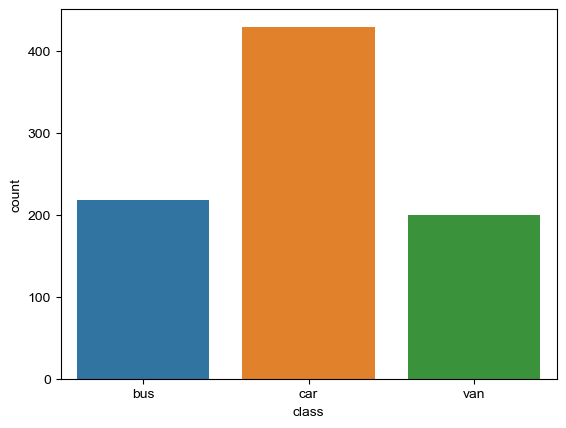

In [20]:
sns.countplot(data['class'])
sns.set(style='whitegrid',color_codes=True)
sns.set(style='white')

Encoding the dependent attribute

In [21]:
labelencoder_x=LabelEncoder()
data['class']=labelencoder_x.fit_transform(data['class'])

Understanding the independent attribute

multivariant analysis

In [22]:
cor=data.corr()
cor

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552,-0.033796
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351,-0.158910
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732,-0.064467
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758,-0.213948
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734,-0.209298
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174,0.352958
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817,-0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905,0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286,-0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770,-0.032399


Splitting the data into dependent and independent attributes

In [23]:
x=data.drop(['class'],axis=1)
y=data['class']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

Before PCA

Support Vector Classifier

In [25]:
model=SVC()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [26]:
#checking accuracy for training set
print('Accuracy for training data: ',model.score(x_train,y_train))
#Checking accuracy for test set
print('Accuracy for testing dataset: ',model.score(x_test,y_test))
#calculating recall value
print("Recall value : ",metrics.recall_score(y_test,prediction,average='macro'))
#calculating precision value
print('Precision value : ',metrics.precision_score(y_test,prediction,average='macro'))
#plotting confusion matrics
print("confusion metrix : \n",metrics.confusion_matrix(prediction,y_test))
print("classification report: \n",metrics.classification_report(prediction,y_test))

Accuracy for training data:  0.6807432432432432
Accuracy for testing dataset:  0.6496062992125984
Recall value :  0.611980333556691
Precision value :  0.6112062523352847
confusion metrix : 
 [[33 13 28]
 [24 99  1]
 [ 2 21 33]]
classification report: 
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        74
           1       0.74      0.80      0.77       124
           2       0.53      0.59      0.56        56

    accuracy                           0.65       254
   macro avg       0.61      0.61      0.61       254
weighted avg       0.64      0.65      0.64       254



After applying PCA

In [27]:
#scaling the dataset
x_z=x.apply(zscore)

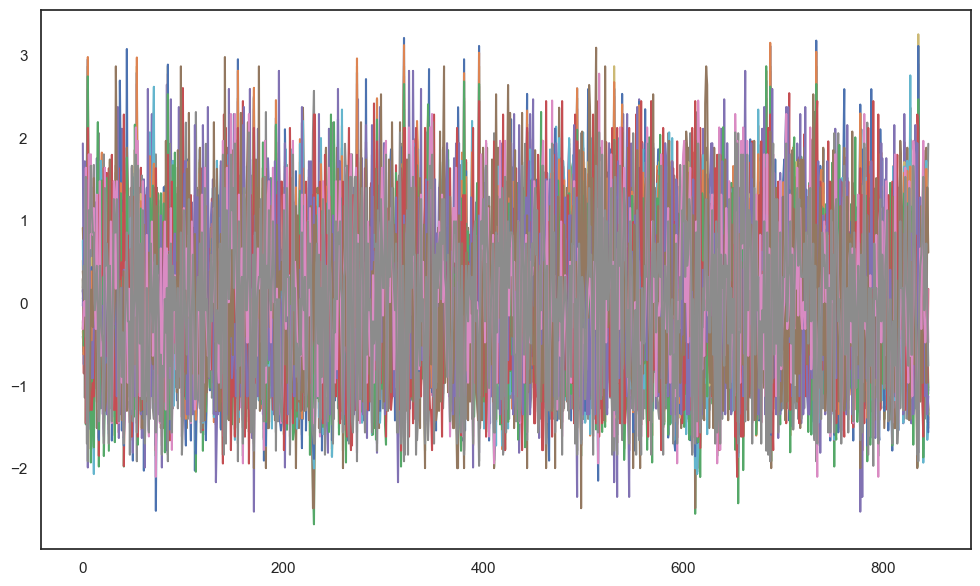

In [28]:
plt.rcParams['figure.figsize']=(12,7)
plt.plot(x_z)
plt.show()

Due to scaling every attribute has brought on same axis

Calculating covariance metrics after scaling
By using covariance matrix we get to know about the mathematical space between independent attributes.

In [29]:
cov_mat=np.cov(x_z.T)
print("covariance matrix \n%s",cov_mat)

covariance matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

Finding eigenvalue and eigenvectors

In [30]:
eigenvalues,eigenvectors=np.linalg.eig(cov_mat)
print("eigenvalues \n%s", eigenvalues)
print("eigenvectors \n%s",eigenvectors)

eigenvalues 
%s [9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]
eigenvectors 
%s [[-2.72502890e-01 -8.70435783e-02 -3.81852075e-02 -1.38675013e-01
   1.37101466e-01 -2.63611383e-01 -2.02717114e-01  7.58796410e-01
  -3.66685918e-01 -1.60045219e-01 -8.40252779e-02 -2.14645175e-02
   1.87350749e-02 -6.89082276e-02 -4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01 -2.01146908e-01  3.80554832e-02
  -1.38995553e-01  7.13474241e-02  3.92275358e-01  6.76034223e-02
  -5.53261885e-02  1.82323962e-01  3.65229874e-02 -1.47247511e-01
   4.89102355e-02 -5.90534770e-02  6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02  6.34621085e-02 -1.08954287e-01
  -8.00174278e-02  1.690061

In [31]:
#making pairs of eigen values and eigen vectors
eig_pairs=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eig_pairs[:]

[(9.749402689379597,
  array([-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
         -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
         -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
         -0.05872048, -0.03801314, -0.08474   ])),
 (3.3507191194129784,
  array([-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
         -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
          0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
         -0.09274624, -0.50162122, -0.50761211])),
 (1.1923815452731585,
  array([-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
         -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
          0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
          0.6706805 , -0.06224071, -0.04170535])),
 (1.1338191632147827,
  array([-0.13867501,  0.03805548, -0.10895429,  0.25435509,  0.61276572,
         -0.27867816

In [32]:
print("eigenvalues in descending order: \n%s" %eigenvalues)

eigenvalues in descending order: 
[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]


Calculating variance and cummulative variance

cummulative variance  [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


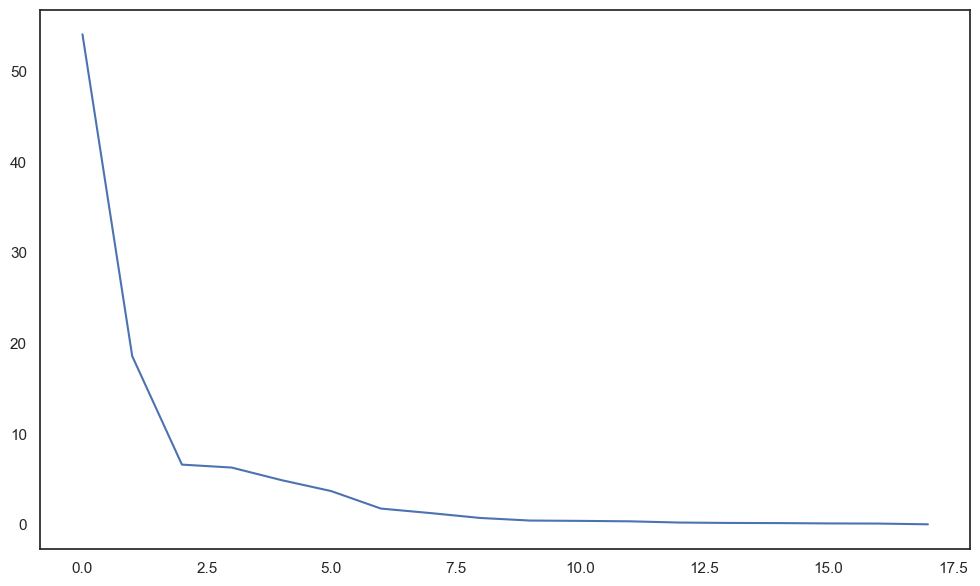

In [33]:
tot=sum(eigenvalues)
var=[(i/tot)* 100 for i in sorted(eigenvalues,reverse=True)]
cum_var=np.cumsum(var)
print("cummulative variance ",cum_var)
plt.plot(var)

As we seen above ,there is decrease in variance as we increase principal component. From 10 principal component we are observing the low variance. So, we will proceed with 10 principal component. 

Reducing dimension to 10

In [34]:
pca=PCA(n_components=10)
data_reduce=pca.fit_transform(x_z)
data_reduce.transpose()

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-0.68196902,  0.10442512,  0.17305277, ..., -0.38820845,
         0.45880709, -0.21433678],
       [ 0.31266966, -0.29625823,  0.19108534, ..., -0.07735512,
         0.82142229,  0.59676772],
       [ 0.14411602, -0.39097765, -0.52948668, ...,  0.55527162,
        -0.34059305,  0.10856429]])

In [35]:
pca.components_

array([[ 0.27250289,  0.28725469,  0.30242111,  0.26971354,  0.09786073,
         0.19520014,  0.31052393, -0.3090069 ,  0.307287  ,  0.27815416,
         0.29976509,  0.30553237,  0.26323762, -0.04193594,  0.03608321,
         0.05872048,  0.03801314,  0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
         0.27867816,  0.00539295,  0.06521486,  0.03089915,  0.04146747,
        -0.06400509, -0.00219687, -0.08553965, -0.115

In [36]:
p_reduce=np.array(eigenvectors[:10])
#projecting original data into pca
x_std=np.dot(x_z,p_reduce.T)
proj_data=pd.DataFrame(x_std)

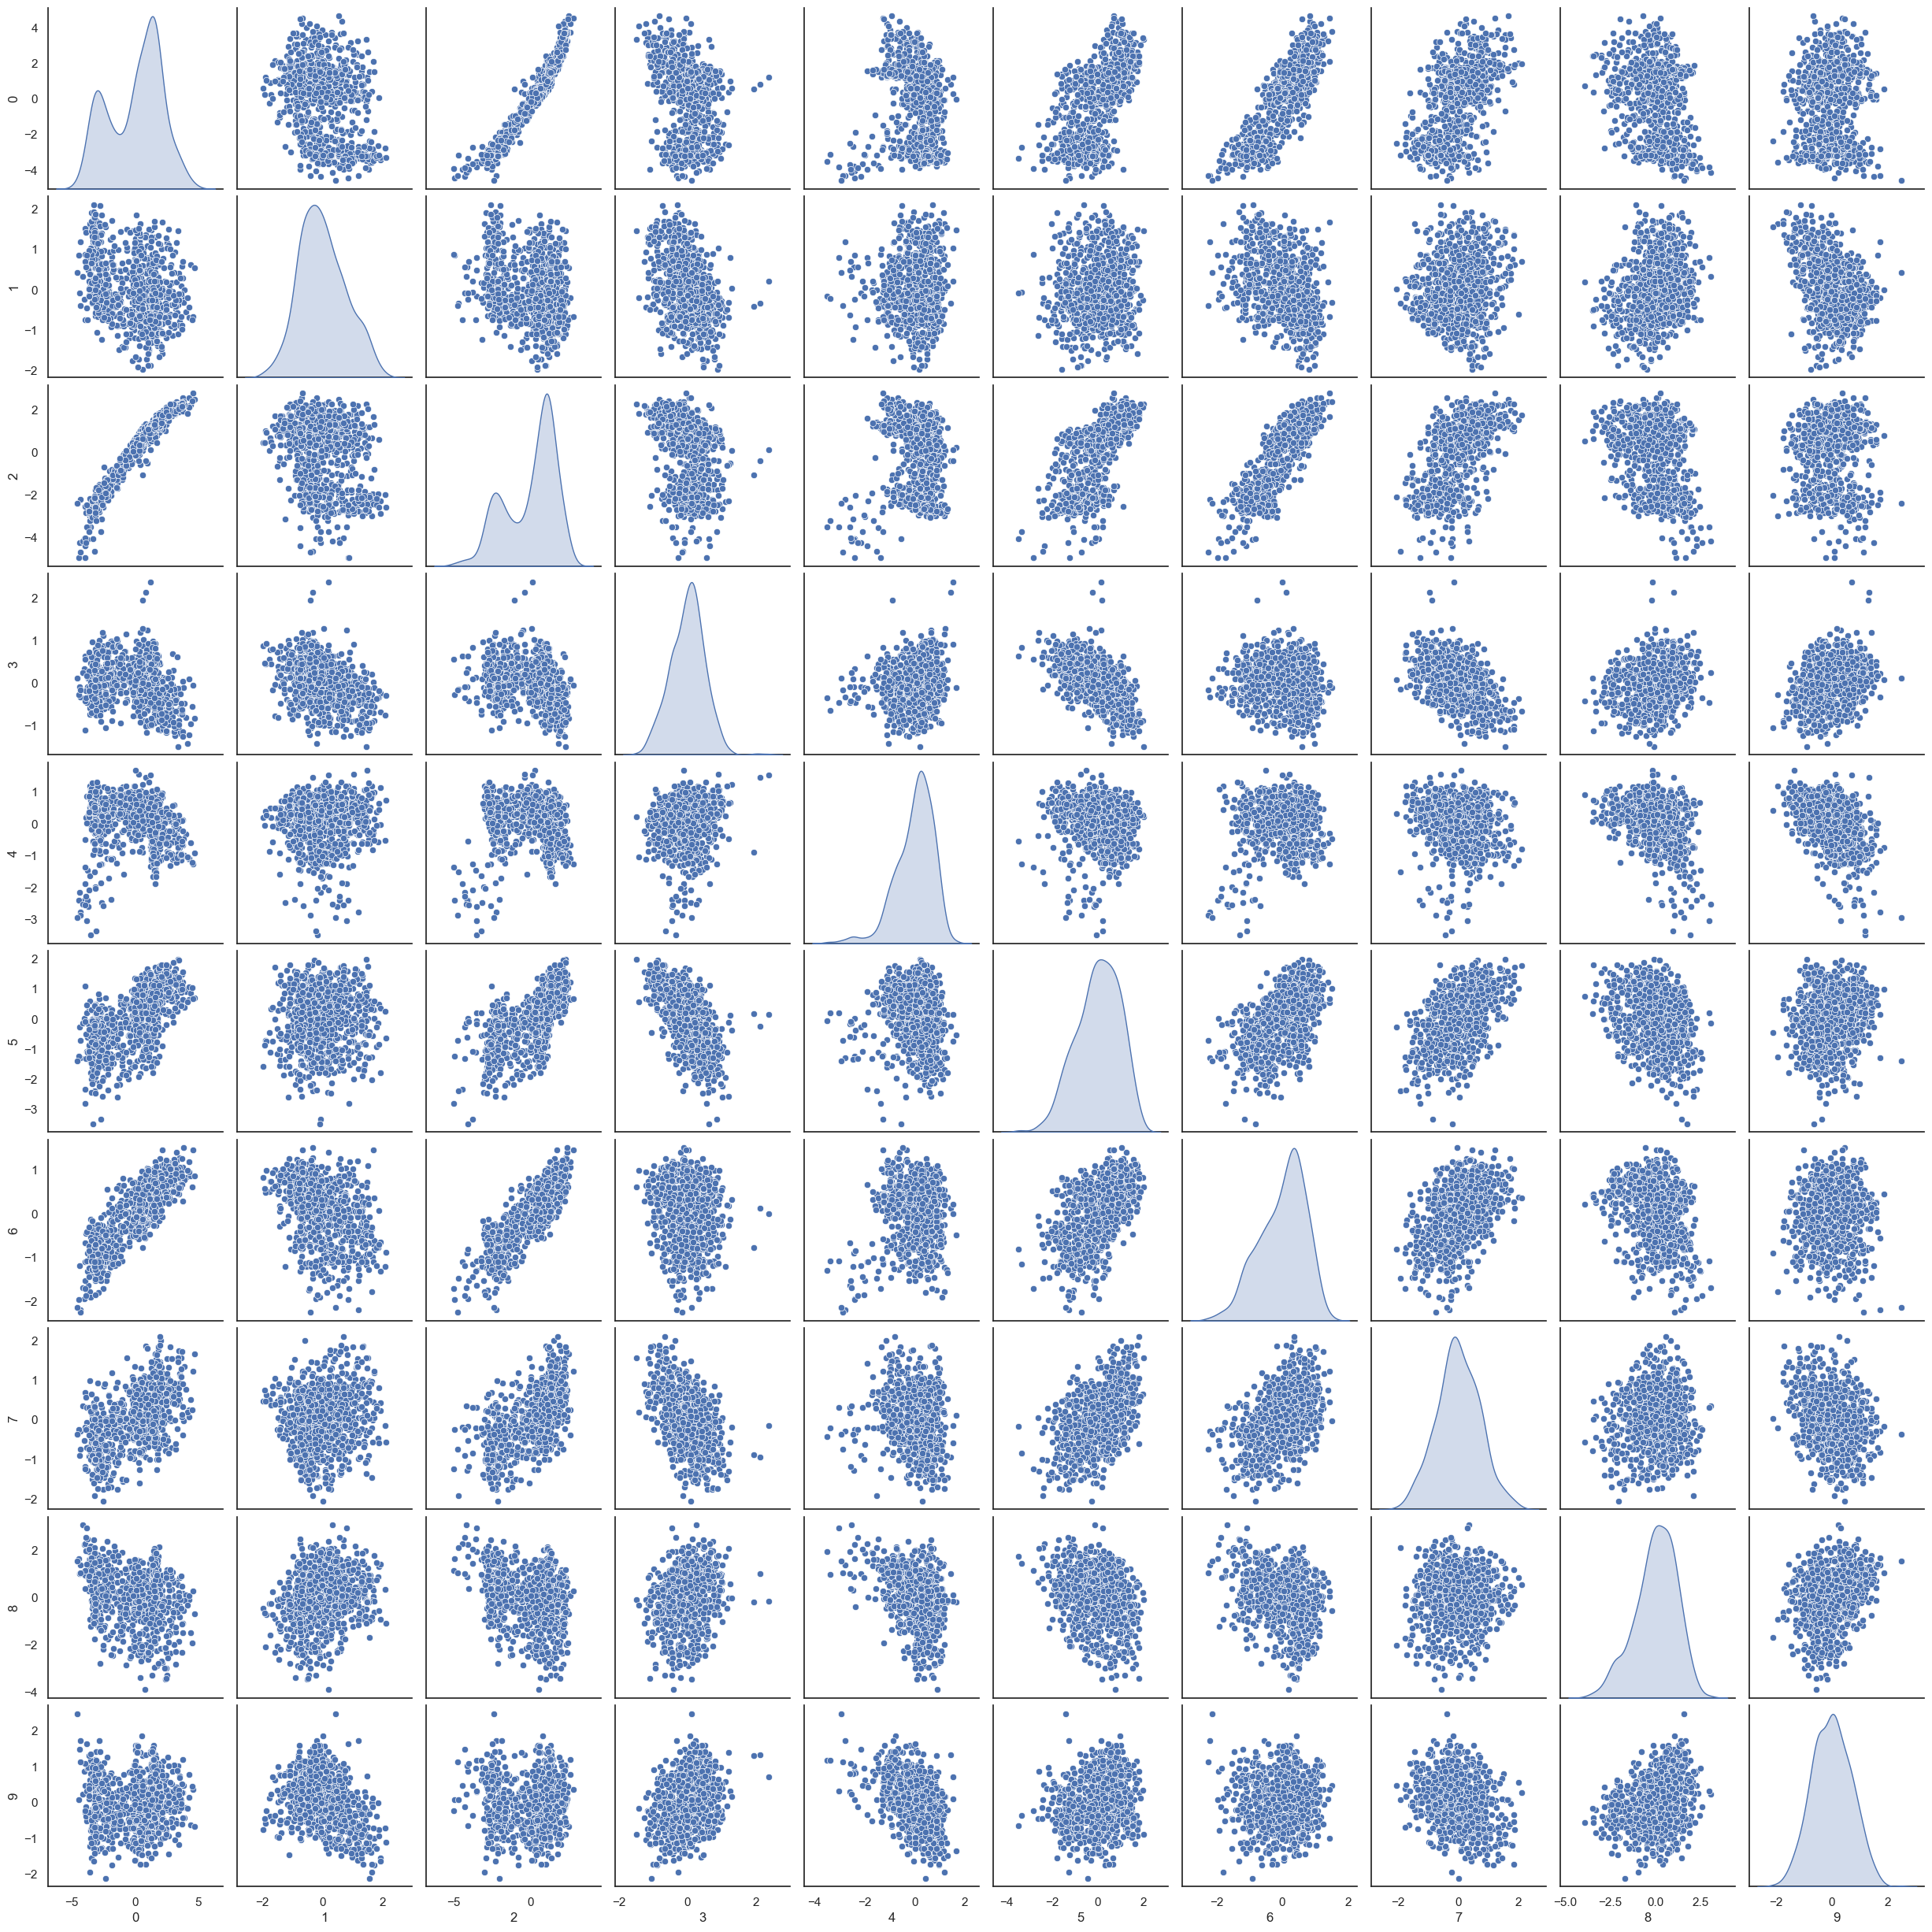

In [37]:
sns.pairplot(proj_data,diag_kind='kde')

As we can see in above pairplot there is some correlation between some attribute.So, we can remove some columns which are not so correlated.

Splitting the data into train and test set.

In [82]:
x_train,x_test,y_train,y_test=train_test_split(proj_data,y,test_size=0.3,random_state=10) 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
model=SVC(gamma='auto')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [93]:
x_train

,0,1,2,3,4,5,6,7,8,9
285,-0.152247,0.074178,0.118788,0.072172,0.474943,-0.170669,-0.057533,-0.367242,0.717566,0.138469
379,-3.065966,-0.012676,-2.588507,0.332342,0.285517,-1.200455,-1.040381,-0.959541,0.061753,0.649083
816,0.092085,0.128558,0.149464,0.412731,0.608998,-0.377555,-0.057529,-0.429851,0.283890,0.876333
33,-2.161645,0.249847,-2.095761,0.553929,0.739620,-1.389910,-1.097798,-1.615417,-1.773918,-0.634299
126,1.306793,-0.899871,0.924884,0.296678,-0.322737,-0.044533,0.682229,0.319867,0.345816,0.632373
...,...,...,...,...,...,...,...,...,...,...
369,0.279472,0.772306,0.402535,-0.242502,-0.306996,0.578866,-0.436872,-0.217310,0.425742,0.081508
320,-3.146584,-0.651478,-2.775331,0.800524,0.232322,-1.915911,-0.445641,-1.094442,0.357126,0.536157
527,-2.717980,0.938748,-1.762122,-0.901291,0.392189,0.370627,-0.743452,-0.064704,-0.950201,-0.955651
125,0.072249,1.853389,0.601300,-0.326852,0.650959,0.500527,0.069742,0.808574,1.290374,-0.764779


In [95]:
print('Accuracy on Training data: ',model.score(x_train, y_train))
print('Accuracy on Test data: ',model.score(x_test, y_test))
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.9121621621621622
Accuracy on Test data:  0.9173228346456693
Recall value:  0.9174045653229723
Precision value:  0.9067557451905083
Confusion Matrix:
 [[ 67   3   3]
 [  3 114   3]
 [  1   8  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.91      0.95      0.93       120
           2       0.90      0.85      0.87        61

    accuracy                           0.92       254
   macro avg       0.92      0.91      0.91       254
weighted avg       0.92      0.92      0.92       254



SVC model is performing well by using pca technique with 0.92 accuracy.

In [101]:
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(x_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.798 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.647 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.712 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.763 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.627 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.815 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [105]:
model = SVC(C=1, kernel="rbf")
scores = cross_val_score(model, proj_data, y, cv=10)
print(scores)
print(np.mean(scores))

[0.87058824 0.89411765 0.88235294 0.89411765 0.87058824 0.92941176
 0.9047619  0.91666667 0.94047619 0.9047619 ]
0.9007843137254902
